# Feature Selection through Severity Ratio Method

In [1]:
# Feature Selection through Pearson Correlation Coefficient Matriximport pandas as pd
import numpy as np
import pandas as pd
df = pd.read_csv("Geelong.csv")
df
df.head()

NumSev = df[df.SEVERITY=='Serious injury accident'].shape[0]
print (NumSev)
pedNum = df.shape[0]
print(pedNum)
pedPctSev = NumSev/float(pedNum)*100
print('percent of ped with serious outcomes',pedPctSev)



NumSev = df[df.SEVERITY=='Other injury accident'].shape[0]
print (NumSev)
pedNum = df.shape[0]
print(pedNum)
pedPctSev = NumSev/float(pedNum)*100
print('percent of ped with other outcomes',pedPctSev)

NumSev = df[df.SEVERITY=='Fatal accident'].shape[0]
print (NumSev)
pedNum = df.shape[0]
print(pedNum)
pedPctSev = NumSev/float(pedNum)*100
print('percent of ped with fatal outcomes',pedPctSev)

df=df[['ABS_CODE', 'ACCIDENT_STATUS','ALCOHOLTIME',	'ACCIDENT_TYPE',	'DAY_OF_WEEK','HIT_RUN_FLAG','LIGHT_CONDITION',	'POLICE_ATTEND','ROAD_GEOMETRY','SEVERITY','SPEED_ZONE','RUN_OFFROAD',	'DEG_URBAN_NAME',	'DEG_URBAN_ALL',	'SRNS',	'SRNS_ALL',	'RMA',	'RMA_ALL',	'DIVIDED',	'DIVIDED_ALL']]

dfs = df[df.SEVERITY=='Serious injury accident']
dfs.drop(columns=['SEVERITY'],inplace=True)
dfs
df

480
1567
percent of ped with serious outcomes 30.63178047223995
1065
1567
percent of ped with other outcomes 67.96426292278238
22
1567
percent of ped with fatal outcomes 1.4039566049776642


/Users/Talha/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ABS_CODE,ACCIDENT_STATUS,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,DEG_URBAN_NAME,DEG_URBAN_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL
0,ABS to receive accident,Finished,No,Collision with vehicle,Tuesday,No,Day,Yes,Not at intersection,Other injury accident,60 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,B,B,Arterial Highway,Arterial Highway,Undivided,Undiv
1,ABS to receive accident,Finished,No,Collision with vehicle,Friday,No,Day,Yes,Cross intersection,Serious injury accident,100 km/hr,No,RURAL_VICTORIA,RURAL_VICTORIA,C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv
2,ABS to receive accident,Finished,No,Collision with vehicle,Sunday,No,Day,Yes,Not at intersection,Serious injury accident,60 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,B,B,Arterial Highway,Arterial Highway,Undivided,Undiv
3,ABS to receive accident,Finished,No,Collision with vehicle,Sunday,No,Day,Yes,Cross intersection,Other injury accident,50 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv"
4,ABS to receive accident,Finished,No,Collision with vehicle,Wednesday,No,Day,Yes,T intersection,Other injury accident,70 km/hr,No,RURAL_VICTORIA,RURAL_VICTORIA,C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,ABS to receive accident,Finished,Yes,No collision and no object struck,Monday,No,Day,Yes,Cross intersection,Other injury accident,60 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,C,C,Arterial Other,"Arterial Other,Local Road",Divided,Div
1563,ABS to receive accident,Finished,No,Collision with vehicle,Thursday,No,Day,Yes,Not at intersection,Other injury accident,70 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,A,A,Arterial Highway,Arterial Highway,Divided,Div
1564,ABS to receive accident,Finished,No,Collision with vehicle,Wednesday,No,Day,Yes,T intersection,Other injury accident,70 km/hr,No,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,B,B,Arterial Highway,"Arterial Highway,Local Road",Divided,"Div,Undiv"
1565,ABS to receive accident,Finished,No,Collision with a fixed object,Monday,No,Day,Yes,Not at intersection,Serious injury accident,70 km/hr,Yes,RURAL_VICTORIA,RURAL_VICTORIA,C,C,Arterial Other,Arterial Other,Undivided,Undiv


In [2]:
# counts=dfs.groupby('SEVERITY')['ALCOHOLTIME'].value_counts()
# print(counts)
# count=df.groupby('ALCOHOLTIME')['ALCOHOLTIME'].value_counts()
# print(count)
col = ['Category','SubCategory','SevereCount','AllCount','SeverePCT','SevereRatio']
Col_Cont = pd.DataFrame(columns=col)
Col_names = dfs.columns

temp = [None]*88
temp2 = [None]*88
index = 0
for i in range(len(Col_names)):
  unique_Val = dfs[Col_names[i]].unique()
 
  for j in range(unique_Val.size):
    temp[index] = (Col_names[i])
    temp2[index] = (unique_Val[j])
    index = index + 1
print(index)
Col_Cont['Category'] = temp
Col_Cont['SubCategory'] = temp2

88


In [3]:
SevereCountTemp = [None]*88
index = 0
for i in range(len(Col_names)):
  x = dfs.groupby(str(Col_names[i]))[str(Col_names[i])].value_counts()
  for j in range((x.size)):
    SevereCountTemp[index] = (x[j])
    index = index + 1

Col_Cont['SevereCount'] = SevereCountTemp
#SevereCountTemp

In [4]:
df.drop(columns=['SEVERITY'],inplace=True)

In [5]:
AllCountTemp = [None]*89
Cat = Col_Cont['Category'].tolist()
i = 0
j=0
L = 0
while (i < 88):
  x = df.groupby(str(Cat[i]))[str(Cat[i])].value_counts()
  if ((x.size) == 1):
    AllCountTemp[i] = x[0]
    i = i +1
    L=L+1
  elif ((x.size) > 1):
    j = 0
    while (j < (x.size)):
      AllCountTemp[i] = x[j]
      i = i+1
      L=L+1
      j = j + 1

In [6]:
AllCountTemp.pop()
print(len(AllCountTemp))

88


In [7]:
Col_Cont['AllCount'] = AllCountTemp


In [8]:
for i in range(88):
  if (Col_Cont.SevereCount[i]>Col_Cont.AllCount[i]):
    Col_Cont.AllCount[i] = Col_Cont.SevereCount[i] + Col_Cont.AllCount[i]

<ipython-input-8-26438a121c9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Col_Cont.AllCount[i] = Col_Cont.SevereCount[i] + Col_Cont.AllCount[i]


In [9]:
Col_Cont['SeverePCT'] = Col_Cont['SevereCount']/Col_Cont['AllCount']

In [10]:
Col_Cont['SevereRatio'] = Col_Cont['SeverePCT']/0.3142

In [11]:
Col_Cont['Feature:Value'] = Col_Cont['Category'].str.cat(Col_Cont['SubCategory'],sep=":")



In [12]:

indexNames = Col_Cont[ Col_Cont['SevereRatio'] <= 0.9999].index

Col_Cont.drop(indexNames , inplace=True)

In [13]:
Col_Cont

,Category,SubCategory,SevereCount,AllCount,SeverePCT,SevereRatio,Feature:Value
3,ALCOHOLTIME,Yes,201,545,0.368807,1.173798,ALCOHOLTIME:Yes
4,ACCIDENT_TYPE,Collision with vehicle,95,210,0.452381,1.439787,ACCIDENT_TYPE:Collision with vehicle
6,ACCIDENT_TYPE,Struck Pedestrian,1,2,0.500000,1.591343,ACCIDENT_TYPE:Struck Pedestrian
7,ACCIDENT_TYPE,Collision with a fixed object,18,40,0.450000,1.432209,ACCIDENT_TYPE:Collision with a fixed object
8,ACCIDENT_TYPE,Vehicle overturned (no collision),39,99,0.393939,1.253785,ACCIDENT_TYPE:Vehicle overturned (no collision)
9,ACCIDENT_TYPE,Fall from or in moving vehicle,23,28,0.821429,2.614349,ACCIDENT_TYPE:Fall from or in moving vehicle
11,DAY_OF_WEEK,Friday,75,78,0.961538,3.060275,DAY_OF_WEEK:Friday
14,DAY_OF_WEEK,Monday,68,163,0.417178,1.327746,DAY_OF_WEEK:Monday
15,DAY_OF_WEEK,Tuesday,75,205,0.365854,1.164397,DAY_OF_WEEK:Tuesday
18,HIT_RUN_FLAG,No,458,691,0.662808,2.109508,HIT_RUN_FLAG:No


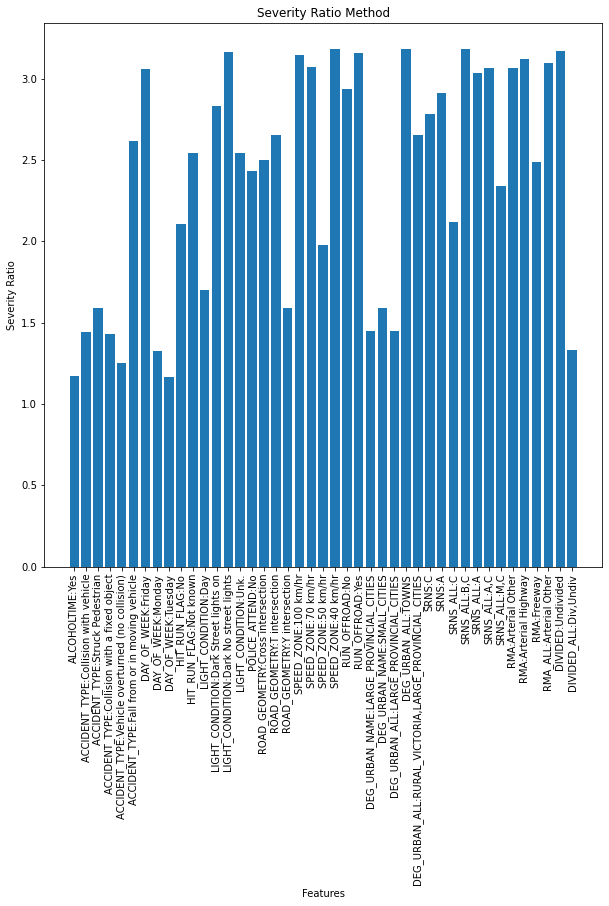

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(Col_Cont['Feature:Value'], Col_Cont['SevereRatio'])
plt.ylabel("Severity Ratio")
plt.xlabel("Features")
plt.title("Severity Ratio Method")

plt.xticks(rotation=90)

plt.show()

# Feature Selection through Pearson Correlation Coefficient Matrix

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [16]:
df=pd.read_csv('Geelong.csv')
df.head()


,Unnamed: 0,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,173,3401917.0,T20130014230,ABS to receive accident,Finished,9/7/2013,16.07.00,No,Collision with vehicle,Tuesday,...,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,B,B,Arterial Highway,Arterial Highway,Undivided,Undiv,Country
1,280,3402024.0,T20130014449,ABS to receive accident,Finished,12/7/2013,15.45.00,No,Collision with vehicle,Friday,...,RURAL_VICTORIA,GEELONG,SOUTH WESTERN REGION,C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv,Country
2,431,3402175.0,T20130014588,ABS to receive accident,Finished,14/7/2013,15.50.00,No,Collision with vehicle,Sunday,...,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,B,B,Arterial Highway,Arterial Highway,Undivided,Undiv,Country
3,435,3402179.0,T20130014602,ABS to receive accident,Finished,14/7/2013,15.47.00,No,Collision with vehicle,Sunday,...,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Country
4,485,3402229.0,T20130014788,ABS to receive accident,Finished,17/7/2013,16.47.00,No,Collision with vehicle,Wednesday,...,RURAL_VICTORIA,GEELONG,SOUTH WESTERN REGION,C,C,Arterial Other,"Arterial Other,Local Road",Undivided,Undiv,Country


In [17]:
df1=df.drop(['OBJECTID','ACCIDENT_NO','ABS_CODE','ACCIDENT_STATUS','LGA_NAME_ALL','REGION_NAME_ALL','SRNS','SRNS_ALL','RMA_ALL','STAT_DIV_NAME','DIVIDED_ALL','DEG_URBAN_ALL','DCA_CODE','ACCIDENT_DATE','VICGRID_Y','VICGRID_X','NODE_ID','HIT_RUN_FLAG','POLICE_ATTEND'],axis='columns')
df1.head()

,Unnamed: 0,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,...,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED
0,173,16.07.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,60 km/hr,No,...,No,0.0,3.0,0.0,3.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided
1,280,15.45.00,No,Collision with vehicle,Friday,Day,Cross intersection,Serious injury accident,100 km/hr,No,...,No,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided
2,431,15.50.00,No,Collision with vehicle,Sunday,Day,Not at intersection,Serious injury accident,60 km/hr,No,...,No,0.0,4.0,0.0,4.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided
3,435,15.47.00,No,Collision with vehicle,Sunday,Day,Cross intersection,Other injury accident,50 km/hr,No,...,No,0.0,2.0,0.0,2.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Other,Divided
4,485,16.47.00,No,Collision with vehicle,Wednesday,Day,T intersection,Other injury accident,70 km/hr,No,...,No,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided


In [18]:
df2=df1.copy()
ser_inj_or_fat=df1['SERIOUSINJURY'] + df1['FATALITY']
df2['ser_inj_or_fat']=ser_inj_or_fat
df2.head()

,Unnamed: 0,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,...,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED,ser_inj_or_fat
0,173,16.07.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,60 km/hr,No,...,0.0,3.0,0.0,3.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided,0.0
1,280,15.45.00,No,Collision with vehicle,Friday,Day,Cross intersection,Serious injury accident,100 km/hr,No,...,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided,1.0
2,431,15.50.00,No,Collision with vehicle,Sunday,Day,Not at intersection,Serious injury accident,60 km/hr,No,...,0.0,4.0,0.0,4.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided,1.0
3,435,15.47.00,No,Collision with vehicle,Sunday,Day,Cross intersection,Other injury accident,50 km/hr,No,...,0.0,2.0,0.0,2.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Other,Divided,0.0
4,485,16.47.00,No,Collision with vehicle,Wednesday,Day,T intersection,Other injury accident,70 km/hr,No,...,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided,0.0


In [19]:
df2.shape

(1567, 46)

In [20]:
df3=df2.drop(['FATALITY','SERIOUSINJURY','INJ_OR_FATAL','NODE_TYPE','RUN_OFFROAD'],axis='columns')
df3.head()

,Unnamed: 0,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,LONGITUDE,...,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED,ser_inj_or_fat
0,173,16.07.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,60 km/hr,144.34102,...,0.0,3.0,0.0,3.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided,0.0
1,280,15.45.00,No,Collision with vehicle,Friday,Day,Cross intersection,Serious injury accident,100 km/hr,144.37017,...,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided,1.0
2,431,15.50.00,No,Collision with vehicle,Sunday,Day,Not at intersection,Serious injury accident,60 km/hr,144.33444,...,0.0,4.0,0.0,4.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Highway,Undivided,1.0
3,435,15.47.00,No,Collision with vehicle,Sunday,Day,Cross intersection,Other injury accident,50 km/hr,144.35731,...,0.0,2.0,0.0,2.0,0.0,0.0,LARGE_PROVINCIAL_CITIES,Arterial Other,Divided,0.0
4,485,16.47.00,No,Collision with vehicle,Wednesday,Day,T intersection,Other injury accident,70 km/hr,144.36124,...,0.0,2.0,0.0,2.0,0.0,0.0,RURAL_VICTORIA,Arterial Other,Undivided,0.0


In [21]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1567 non-null   int64  
 1   ACCIDENT_TIME      1567 non-null   object 
 2   ALCOHOLTIME        1567 non-null   object 
 3   ACCIDENT_TYPE      1567 non-null   object 
 4   DAY_OF_WEEK        1567 non-null   object 
 5   LIGHT_CONDITION    1567 non-null   object 
 6   ROAD_GEOMETRY      1567 non-null   object 
 7   SEVERITY           1567 non-null   object 
 8   SPEED_ZONE         1567 non-null   object 
 9   LONGITUDE          1567 non-null   float64
 10  LATITUDE           1567 non-null   float64
 11  LGA_NAME           1567 non-null   object 
 12  REGION_NAME        1567 non-null   object 
 13  TOTAL_PERSONS      1567 non-null   float64
 14  OTHERINJURY        1567 non-null   float64
 15  NONINJURED         1567 non-null   float64
 16  MALES              1567 

In [22]:
Small_towns=df3.DEG_URBAN_NAME !='SMALL_TOWNS'
Small_towns.head()

0    True
1    True
2    True
3    True
4    True
Name: DEG_URBAN_NAME, dtype: bool

In [23]:
df4=df3[Small_towns]
df4.shape
        


(1565, 41)

In [24]:
small_cities=df4.DEG_URBAN_NAME !='SMALL_CITIES'
small_cities.head()

0    True
1    True
2    True
3    True
4    True
Name: DEG_URBAN_NAME, dtype: bool

In [25]:
df5=df4[small_cities]
df5.shape

(1513, 41)

In [26]:
towns=df5.DEG_URBAN_NAME !='TOWNS'
towns.head()

0    True
1    True
2    True
3    True
4    True
Name: DEG_URBAN_NAME, dtype: bool

In [27]:
df6=df5[towns]
df6.shape

(1460, 41)

In [28]:
unknown_speed=df6.SPEED_ZONE !='Not known'
unknown_speed.head()

0    True
1    True
2    True
3    True
4    True
Name: SPEED_ZONE, dtype: bool

In [29]:
df7=df6[unknown_speed]
df7.shape

(1433, 41)

In [30]:
ninety_speed=df7.SPEED_ZONE !='90 km/hr'
ninety_speed.head()


0    True
1    True
2    True
3    True
4    True
Name: SPEED_ZONE, dtype: bool

In [31]:
df8=df7[ninety_speed]
df8.shape

(1429, 41)

In [32]:
forty_speed=df8.SPEED_ZONE !='40 km/hr'
forty_speed.head()

0    True
1    True
2    True
3    True
4    True
Name: SPEED_ZONE, dtype: bool

In [33]:
df9=df8[forty_speed]
df9.shape

(1408, 41)

In [34]:
Camping_ground=df9.SPEED_ZONE!='Camping grounds or off road'
Camping_ground.head()

0    True
1    True
2    True
3    True
4    True
Name: SPEED_ZONE, dtype: bool

In [35]:
df10=df9[Camping_ground]
df10.shape

(1405, 41)

In [36]:
other_speed=df10.SPEED_ZONE!='Other speed limit'
other_speed.head()


0    True
1    True
2    True
3    True
4    True
Name: SPEED_ZONE, dtype: bool

In [37]:
df11=df10[other_speed]
df11.shape

(1404, 41)

In [38]:
unknown_geometry=df11.ROAD_GEOMETRY!='Unknown'
unknown_geometry.head()

0    True
1    True
2    True
3    True
4    True
Name: ROAD_GEOMETRY, dtype: bool

In [39]:
df12=df11[unknown_geometry]
df12.shape

(1403, 41)

In [40]:
y_intersection=df12.ROAD_GEOMETRY!='y intersection'
y_intersection.head()

0    True
1    True
2    True
3    True
4    True
Name: ROAD_GEOMETRY, dtype: bool

In [41]:
df13=df12[y_intersection]
df13.shape

(1403, 41)

In [42]:
animal_hit=df13.ACCIDENT_TYPE!='Struck animal'
animal_hit.head()

0    True
1    True
2    True
3    True
4    True
Name: ACCIDENT_TYPE, dtype: bool

In [43]:
df14=df13[animal_hit]
df14.shape

(1398, 41)

In [44]:
fall_from_vehicle=df14.ACCIDENT_TYPE!='Fall from or in moving vehicle'
fall_from_vehicle.head()

0    True
1    True
2    True
3    True
4    True
Name: ACCIDENT_TYPE, dtype: bool

In [45]:
df15=df14[fall_from_vehicle]
df15.shape

(1396, 41)

In [46]:
collision_with_other=df15.ACCIDENT_TYPE!='collision with some other object'
collision_with_other.head()


0    True
1    True
2    True
3    True
4    True
Name: ACCIDENT_TYPE, dtype: bool

In [47]:
df16=df15[collision_with_other]
df16.shape

(1393, 41)

In [48]:
dark_street_unknown=df16.LIGHT_CONDITION!='Dark Street lights unknown'
dark_street_unknown.head()


0    True
1    True
2    True
3    True
4    True
Name: LIGHT_CONDITION, dtype: bool

In [49]:
df17=df16[dark_street_unknown]
df17.shape

(1388, 41)

In [50]:
unk=df17.LIGHT_CONDITION!='Unk.'
unk.head()

0    True
1    True
2    True
3    True
4    True
Name: LIGHT_CONDITION, dtype: bool

In [51]:
df18=df17[unk]
df18.shape

(1359, 41)

In [52]:
dark_street_off=df18.LIGHT_CONDITION!='Dark Street lights off'
dark_street_off.head()

0    True
1    True
2    True
3    True
4    True
Name: LIGHT_CONDITION, dtype: bool

In [53]:
df19=df18[dark_street_off]
df19.shape

(1357, 41)

In [54]:
df20=df19.drop(['UNKNOWN','ALCOHOL_RELATED','ACCIDENT_TIME','TOTAL_PERSONS','MALES','FEMALES','LGA_NAME','REGION_NAME'],axis='columns')
df20.shape

(1357, 33)

In [55]:
df20.groupby('RMA').count()

,Unnamed: 0,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,LONGITUDE,LATITUDE,...,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DIVIDED,ser_inj_or_fat
RMA,,,,,,,,,,,,,,,,,,,,,
Arterial Highway,596,596,596,596,596,596,596,596,596,596,...,596,596,596,596,596,596,596,596,596,596
Arterial Other,661,661,661,661,661,661,661,661,661,661,...,661,661,661,661,661,661,661,661,661,661
Freeway,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [56]:
df21=df20.copy()


In [57]:
df22=df21.drop(['LONGITUDE','LATITUDE'],axis='columns')
df22.shape

(1357, 31)

In [58]:
df22.columns

Index(['Unnamed: 0', 'ALCOHOLTIME', 'ACCIDENT_TYPE', 'DAY_OF_WEEK',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'OTHERINJURY', 'NONINJURED', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE',
       'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'RMA', 'DIVIDED',
       'ser_inj_or_fat'],
      dtype='object')

In [59]:
df22.groupby('ALCOHOLTIME').count()

,Unnamed: 0,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,OTHERINJURY,NONINJURED,BICYCLIST,...,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED,ser_inj_or_fat
ALCOHOLTIME,,,,,,,,,,,,,,,,,,,,,
No,882,882,882,882,882,882,882,882,882,882,...,882,882,882,882,882,882,882,882,882,882
Yes,475,475,475,475,475,475,475,475,475,475,...,475,475,475,475,475,475,475,475,475,475


In [60]:
from sklearn.preprocessing import LabelEncoder
le_ALCOHOLTIME=LabelEncoder()
le_ACCIDENT_TYPE=LabelEncoder()
le_DAY_OF_WEEK=LabelEncoder()
le_LIGHT_CONDITION=LabelEncoder()
le_ROAD_GEOMETRY=LabelEncoder()
le_SEVERITY=LabelEncoder()
le_SPEED_ZONE=LabelEncoder()
le_DEG_URBAN_NAME=LabelEncoder()
le_RMA=LabelEncoder()
le_DIVIDED=LabelEncoder()

In [61]:
df22['ALCOHOLTIME']=le_ALCOHOLTIME.fit_transform(df22['ALCOHOLTIME'])
df22['ACCIDENT_TYPE']=le_ACCIDENT_TYPE.fit_transform(df22['ACCIDENT_TYPE'])
df22['DAY_OF_WEEK']=le_DAY_OF_WEEK.fit_transform(df22['DAY_OF_WEEK'])
df22['LIGHT_CONDITION']=le_LIGHT_CONDITION.fit_transform(df22['LIGHT_CONDITION'])
df22['ROAD_GEOMETRY']=le_ROAD_GEOMETRY.fit_transform(df22['ROAD_GEOMETRY'])
df22['SEVERITY']=le_SEVERITY.fit_transform(df22['SEVERITY'])
df22['SPEED_ZONE']=le_SPEED_ZONE.fit_transform(df22['SPEED_ZONE'])
df22['DEG_URBAN_NAME']=le_DEG_URBAN_NAME.fit_transform(df22['DEG_URBAN_NAME'])
df22['RMA']=le_RMA.fit_transform(df22['RMA'])
df22['DIVIDED']=le_DIVIDED.fit_transform(df22['DIVIDED'])
df22.head()

,Unnamed: 0,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,OTHERINJURY,NONINJURED,...,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED,ser_inj_or_fat
0,173,0,1,5,2,2,1,2,1.0,2.0,...,0.0,3.0,0.0,3.0,0.0,0.0,0,0,1,0.0
1,280,0,1,0,2,0,2,0,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,0.0,1,1,1,1.0
2,431,0,1,3,2,2,2,2,0.0,3.0,...,0.0,4.0,0.0,4.0,0.0,0.0,0,0,1,1.0
3,435,0,1,3,2,0,1,1,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0,1,0,0.0
4,485,0,1,6,2,3,1,3,1.0,1.0,...,0.0,2.0,0.0,2.0,0.0,0.0,1,1,1,0.0


In [62]:
x=df22.drop(['SEVERITY'],axis='columns')
y=df22['SEVERITY']

In [63]:
Correlation = df22.corr()
Correlation.style.background_gradient(cmap='rainbow')

,Unnamed: 0,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,OTHERINJURY,NONINJURED,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,RMA,DIVIDED,ser_inj_or_fat
Unnamed: 0,1.000000,-0.023516,0.028655,0.019632,-0.083811,0.024726,0.002605,0.052707,0.001313,-0.000643,0.005723,0.024271,0.016350,-0.021777,-0.093212,-0.028273,-0.036585,-0.054509,0.006515,-0.012962,-0.018113,-0.021437,0.000261,0.009306,-0.005878,-0.028273,-0.028722,0.036136,-0.018160,-0.012076,0.035858
ALCOHOLTIME,-0.023516,1.000000,-0.027510,-0.115748,-0.421085,-0.093716,0.093975,-0.022481,-0.062665,-0.080536,-0.047545,0.019727,-0.132624,0.046717,0.004030,-0.009879,-0.002334,-0.017565,-0.044573,-0.141084,0.079531,0.063777,-0.129062,-0.054251,-0.078360,-0.009879,-0.002861,0.047716,-0.000958,-0.024700,0.110727
ACCIDENT_TYPE,0.028655,-0.027510,1.000000,-0.022701,0.035089,-0.023838,0.036671,-0.008011,-0.052556,-0.001341,0.007523,-0.071236,-0.182565,0.521693,0.039595,0.169151,0.158699,0.163850,0.276104,-0.035698,-0.066487,-0.050603,-0.123778,0.071215,-0.197761,0.169151,0.047663,-0.094857,0.004663,-0.037340,0.024761
DAY_OF_WEEK,0.019632,-0.115748,-0.022701,1.000000,0.002901,0.011275,-0.039922,-0.029614,-0.003954,-0.026973,0.021523,-0.065252,0.015931,-0.020242,0.043392,0.011933,0.007342,-0.015893,0.009589,0.060538,0.002822,0.043454,0.038712,-0.015871,0.034945,0.011933,-0.044872,-0.015557,-0.011345,0.035860,-0.024325
LIGHT_CONDITION,-0.083811,-0.421085,0.035089,0.002901,1.000000,0.028744,-0.060716,0.097033,0.072887,0.046606,0.108927,-0.052848,0.098862,-0.056541,0.006592,0.043874,0.034887,0.012343,0.012343,0.082895,-0.034337,-0.075299,0.135693,0.010683,0.060563,0.043874,0.063220,-0.167117,-0.099309,-0.001435,-0.117774
ROAD_GEOMETRY,0.024726,-0.093716,-0.023838,0.011275,0.028744,1.000000,0.001526,0.007377,-0.035744,-0.044736,-0.061677,-0.065465,-0.024755,-0.004864,0.033066,0.054845,-0.016952,-0.023930,0.048394,-0.006271,-0.007225,0.005189,-0.007788,-0.011883,-0.006630,0.054845,-0.036468,0.073733,0.046936,0.066994,-0.020596
SEVERITY,0.002605,0.093975,0.036671,-0.039922,-0.060716,0.001526,1.000000,-0.022003,-0.528141,-0.131988,-0.012185,-0.042436,-0.136554,0.037560,0.030054,0.132504,-0.018980,0.045249,-0.019976,0.019016,-0.049219,0.004547,-0.123283,0.010439,-0.143194,0.132504,0.059469,0.145988,0.078559,0.064105,0.752192
SPEED_ZONE,0.052707,-0.022481,-0.008011,-0.029614,0.097033,0.007377,-0.022003,1.000000,0.050872,0.106838,-0.027874,0.041504,0.165599,-0.024519,0.018809,-0.030133,-0.022524,0.022693,-0.039188,0.033246,0.039369,-0.029410,0.167008,-0.037627,0.164317,-0.030133,0.031851,-0.241850,-0.539966,-0.215437,-0.024121
OTHERINJURY,0.001313,-0.062665,-0.052556,-0.003954,0.072887,-0.035744,-0.528141,0.050872,1.000000,0.082427,-0.076387,0.379482,0.303054,-0.082755,0.004904,-0.141362,-0.009086,-0.038999,-0.062190,0.029667,0.104630,-0.021795,0.251192,-0.035202,0.289699,-0.141362,-0.049276,-0.129393,-0.039227,-0.028146,-0.529519
NONINJURED,-0.000643,-0.080536,-0.001341,-0.026973,0.046606,-0.044736,-0.131988,0.106838,0.082427,1.000000,-0.053385,0.705180,0.542627,-0.016254,0.006491,-0.078629,-0.005498,-0.009565,-0.014722,0.038639,0.180700,-0.037673,0.552820,0.013629,0.491821,-0.078629,0.018698,-0.169584,-0.145818,-0.068915,-0.148603


In [64]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("\tTop Absolute Correlations\n")
print(get_top_abs_correlations(Correlation, 3))

Target_Variable = abs(Correlation["SEVERITY"])
#Selecting highly correlated features with pressure
RF = Target_Variable[Target_Variable > 0.3]
print (RF,"\n")
relevant_features = np.max(RF)
print ("The feature that has the most correlation with SEVERITY = ", relevant_features, "\n")

	Top Absolute Correlations

MOTORIST  MOTORCYCLE          1.000000
DRIVER    PASSENGERVEHICLE    0.983269
          NO_OF_VEHICLES      0.959908
dtype: float64
SEVERITY          1.000000
OTHERINJURY       0.528141
ser_inj_or_fat    0.752192
Name: SEVERITY, dtype: float64 

The feature that has the most correlation with SEVERITY =  1.0 



# Decision Tree

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)

In [67]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9669117647058824

In [68]:
from sklearn.metrics import mean_absolute_error
y_pred=rf.predict(x_test)
print (mean_absolute_error(y_test, y_pred))

0.058823529411764705


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.99      1.00      0.99       178
           2       0.93      0.97      0.95        88

    accuracy                           0.97       272
   macro avg       0.64      0.66      0.65       272
weighted avg       0.95      0.97      0.96       272



# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Feats_Log = StandardScaler().fit_transform(x)
Features_Log = PolynomialFeatures(degree=2).fit_transform(Feats_Log)

X_train_Logstc, X_test_Logstc, y_train_Logstc, y_test_Logstc = train_test_split(Features_Log, y, train_size=0.8, random_state=5)

In [71]:
#Solver lbfgs basically means replicating the smaller class until you have as many samples as in the larger one,
Logistic_Model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train_Logstc, y_train_Logstc)
pred_with_Logistic = (Logistic_Model.predict_proba(X_test_Logstc)[:,1] >= 0.45).astype(int)

print ("Accuracy of the model is = ", (Logistic_Model.score(X_test_Logstc, y_test_Logstc))*100,"%\n")

Accuracy of the model is =  96.32352941176471 %



In [72]:
from sklearn import linear_model
Lass = linear_model.Lasso(alpha=0.1)
Lass.fit(X_train_Logstc, y_train_Logstc)
pred_with_Lasso= Lass.predict(X_test_Logstc)
print ("Accuracy of the model is = ", (Lass.score(X_test_Logstc, y_test_Logstc))*100,"%\n")

Accuracy of the model is =  60.3322458818661 %



In [73]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print ("\nConfusion Matrix:")
cm = confusion_matrix(y_test_Logstc, pred_with_Logistic)
print(cm)
print ("==========================================================")

target_names = ['Other', 'Severe', 'Fatal']
print ("==========================================================")
print ("\n\tTest performance using Precision and recall\n")
print(classification_report(y_test_Logstc, pred_with_Logistic, target_names=target_names))
print ("==========================================================")


Confusion Matrix:
[[  4   0   0]
 [  2 187   0]
 [ 78   1   0]]

	Test performance using Precision and recall

              precision    recall  f1-score   support

       Other       0.05      1.00      0.09         4
      Severe       0.99      0.99      0.99       189
       Fatal       0.00      0.00      0.00        79

    accuracy                           0.70       272
   macro avg       0.35      0.66      0.36       272
weighted avg       0.69      0.70      0.69       272



/Users/Talha/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print ("Accuracy of the Decision Tree model is = ",rf.score(x_test,y_test)*100,"%\n")
print ("Accuracy of the Logistic model is = ", (Logistic_Model.score(X_test_Logstc, y_test_Logstc))*100,"%\n")

Accuracy of the Decision Tree model is =  96.69117647058823 %

Accuracy of the Logistic model is =  96.32352941176471 %



([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

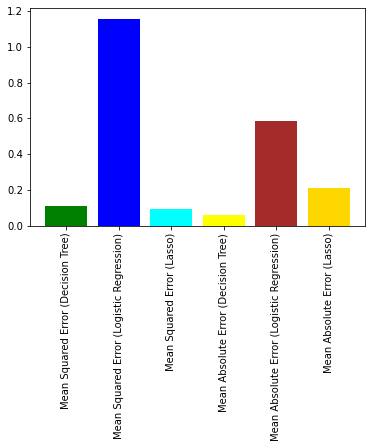

In [80]:
from sklearn.metrics import *
MSE_DT= mean_squared_error(y_test, y_pred)
MSE_LM= mean_squared_error(y_test_Logstc, pred_with_Logistic)
MSE_Lasso= mean_squared_error(y_test_Logstc, pred_with_Lasso)

MAE_DT= mean_absolute_error(y_test, y_pred)
MAE_LM= mean_absolute_error(y_test_Logstc, pred_with_Logistic)
MAE_Lasso= mean_absolute_error(y_test_Logstc, pred_with_Lasso)

names_=['Mean Squared Error (Decision Tree)', 'Mean Squared Error (Logistic Regression)',
        'Mean Squared Error (Lasso)', 'Mean Absolute Error (Decision Tree)', 
        'Mean Absolute Error (Logistic Regression)','Mean Absolute Error (Lasso)']
results_=[MSE_DT, MSE_LM, MSE_Lasso, MAE_DT, MAE_LM, MAE_Lasso]
plt.bar(names_,results_,color=['green', 'blue', 'cyan', 'yellow', 'brown', 'gold'])
plt.xticks(rotation=90)

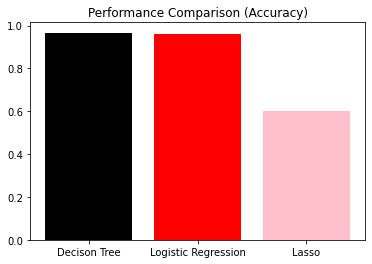

In [77]:

DT= rf.score(x_test,y_test)
LM= Logistic_Model.score(X_test_Logstc, y_test_Logstc)
Lasso= Lass.score(X_test_Logstc, y_test_Logstc)
names=['Decison Tree', 'Logistic Regression', 'Lasso']
results=[DT, LM, Lasso]
plt.bar(names,results,color=['black', 'red', 'pink'])
plt.title('Performance Comparison (Accuracy)');

